In [21]:
# NLP Text Classification - SMS Spam Detection
# Dataset: SMS Spam Collection Dataset

In [22]:
#  Import Libraries

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [24]:
# 2. Data Loading and Exploration

In [25]:
data = pd.read_csv(r"C:\Users\Verghese\Downloads\spam.csv", encoding='latin-1')
data = data.rename(columns={'v1': 'label', 'v2': 'message'})
data = data[['label', 'message']]
print("Data Loaded Successfully!")
print(data.head())

Data Loaded Successfully!
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [26]:
# Data Preprocessing
# Convert labels to binary

In [27]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
print(data.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [28]:
# Text vectorization

In [29]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['message']).toarray()
y = data['label']

print("Shape of X (TF-IDF features):", X.shape)
print("Shape of y (labels):", y.shape)

Shape of X (TF-IDF features): (5572, 3000)
Shape of y (labels): (5572,)


In [30]:
# Train-Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Model Building and Training

In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [34]:
# Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.74      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115

Confusion Matrix:


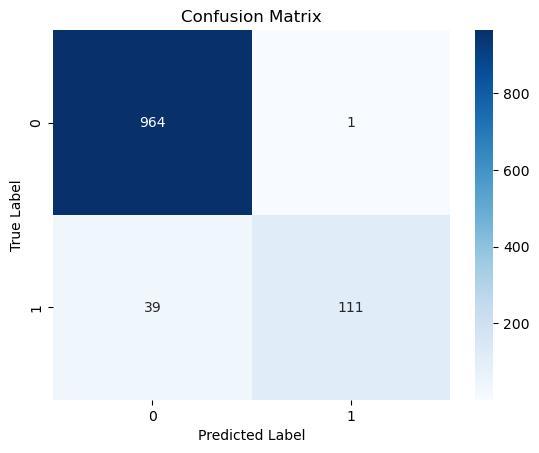

In [35]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [40]:
custom_message = input("Enter a message to classify as spam or ham: ")
custom_message_tfidf = tfidf.transform([custom_message])
prediction = model.predict(custom_message_tfidf)[0]

predicted_label = 'spam' if prediction == 1 else 'ham'
print(f"\nYour message: \"{custom_message}\"")
print(f"Prediction: {predicted_label}")



Enter a message to classify as spam or ham:  WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.



Your message: "WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."
Prediction: spam
